In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [3]:
cols = df.columns
cols = cols.to_list()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [4]:
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [7]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.68      ,  0.64285714,  0.5       ,  0.625     ,  0.5       ,
         0.74264706,  1.        ],
       [ 0.7       ,  0.78571429,  1.        ,  0.75      ,  1.        ,
         0.83088235,  1.        ],
       [ 0.16      ,  0.32142857,  0.75      ,  0.375     ,  0.875     ,
         0.18014706,  1.        ],
       [ 0.42      ,  0.5       ,  0.25      ,  0.625     ,  0.5       ,
         0.38970588,  1.        ],
       [ 0.62      ,  0.78571429,  0.75      ,  0.75      ,  1.        ,
         0.70588235,  0.        ],
       [ 0.54      ,  0.5       ,  0.5       ,  0.75      ,  0.625     ,
         0.47794118,  1.        ],
       [ 0.28      ,  0.39285714,  1.        ,  1.        ,  0.75      ,
         0.52941176,  0.        ],
       [ 0.86      ,  0.96428571,  1.        ,  1.        ,  0.875     ,
         0.94852941,  1.        ],
       [ 0.82      ,  0.82142857,  1.        ,  0.875     ,  0.625     ,
         0.79411765,  1.        ],
       [ 0.54      ,  0.3928

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

## Hidden layer 1
model.add(Dense(7, activation='relu', input_dim=7))

## Hidden layer 2
model.add(Dense(7, activation='relu', input_dim=7))

## Output layer
model.add(Dense(1, activation='linear'))

c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [16]:
history = model.fit(X_train, y_train, epochs=600, validation_split=0.2)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0969 - val_loss: 0.0645
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - val_loss: 0.0222
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - val_loss: 0.0206
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - val_loss: 0.0212
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - val_loss: 0.0255
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - val_loss: 0.0289
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0321
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0365 - val_loss: 0.0241
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0293 - val_loss: 0.0368
Epoch 10/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0281 - val_loss: 0.0202
Epoch 11/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.0256
Epoch 12/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

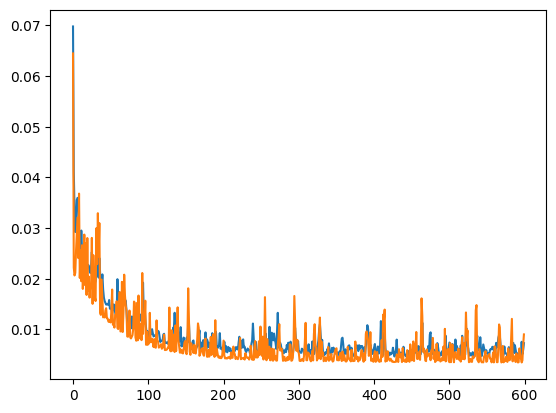

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
model.save("model.keras")

## Check r2 score

In [19]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5958587150392081

In [21]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0102


0.009834439493715763